In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('Data/df_cleaned.csv', sep=",")
df.shape

(1512, 46)

In [4]:
df

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,98101.0,7,47.61220,-122.33799,27,1.0,12,88434,0,88434.0,...,0,0,0,0,0,0,0,0,0,0
1,98101.0,7,47.61317,-122.33393,93,1.0,11,103566,15064,83880.0,...,0,0,0,0,0,0,0,0,0,0
2,98101.0,7,47.61412,-122.33664,26,1.0,10,61320,0,61320.0,...,0,0,0,0,0,0,0,0,0,0
3,98121.0,7,47.61375,-122.34047,77,1.0,18,175580,62000,123445.0,...,0,0,0,0,0,0,0,0,0,0
4,98101.0,7,47.61623,-122.33657,96,1.0,2,97288,37198,88830.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,0.0,2,47.56722,-122.31154,87,1.0,1,12294,0,12294.0,...,0,0,0,0,0,0,0,0,0,0
1508,0.0,2,47.59625,-122.32283,101,1.0,1,16000,0,16000.0,...,0,0,0,0,0,0,0,0,0,0
1509,0.0,7,47.63644,-122.35784,71,1.0,1,13157,0,7583.0,...,0,0,0,0,0,0,0,0,0,0
1510,0.0,1,47.52832,-122.32431,86,1.0,1,14101,0,6601.0,...,0,0,0,0,0,0,0,0,0,0


[VISUALIZATION] Boxplot of Building gross floor area

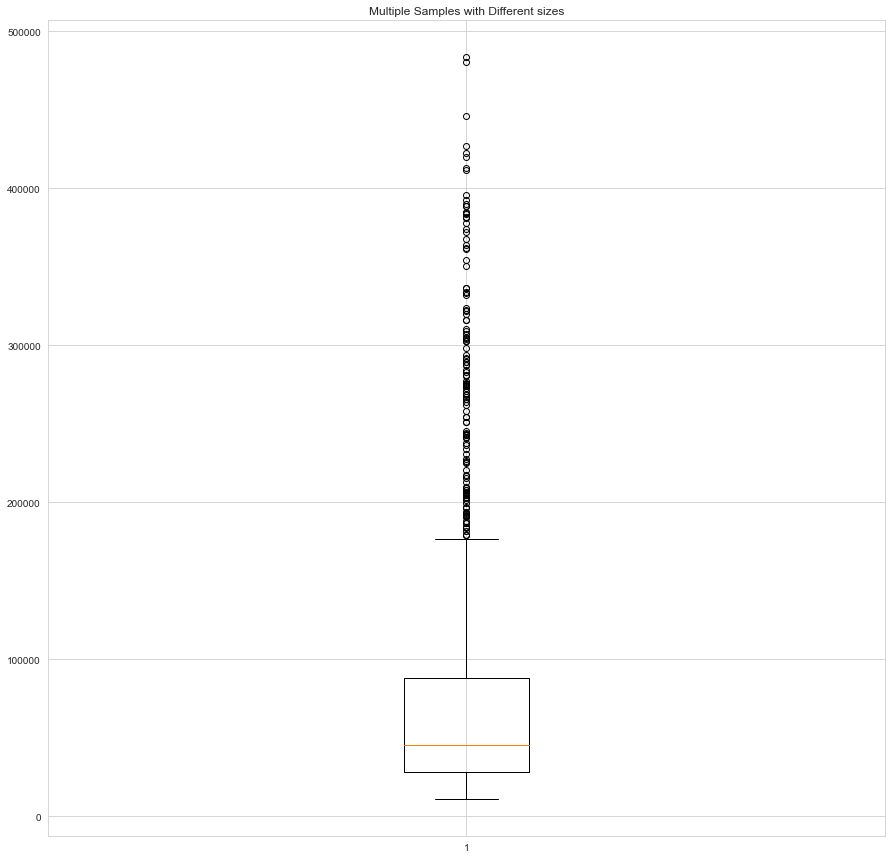

In [5]:
boxplot_data = df['PropertyGFATotal'][df['PropertyGFATotal'] < 500000]
fig7, ax7 = plt.subplots(figsize=(15,15))
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(boxplot_data)
plt.show()

### [VISUALIZATION] Heat map of correlation table

<AxesSubplot:>

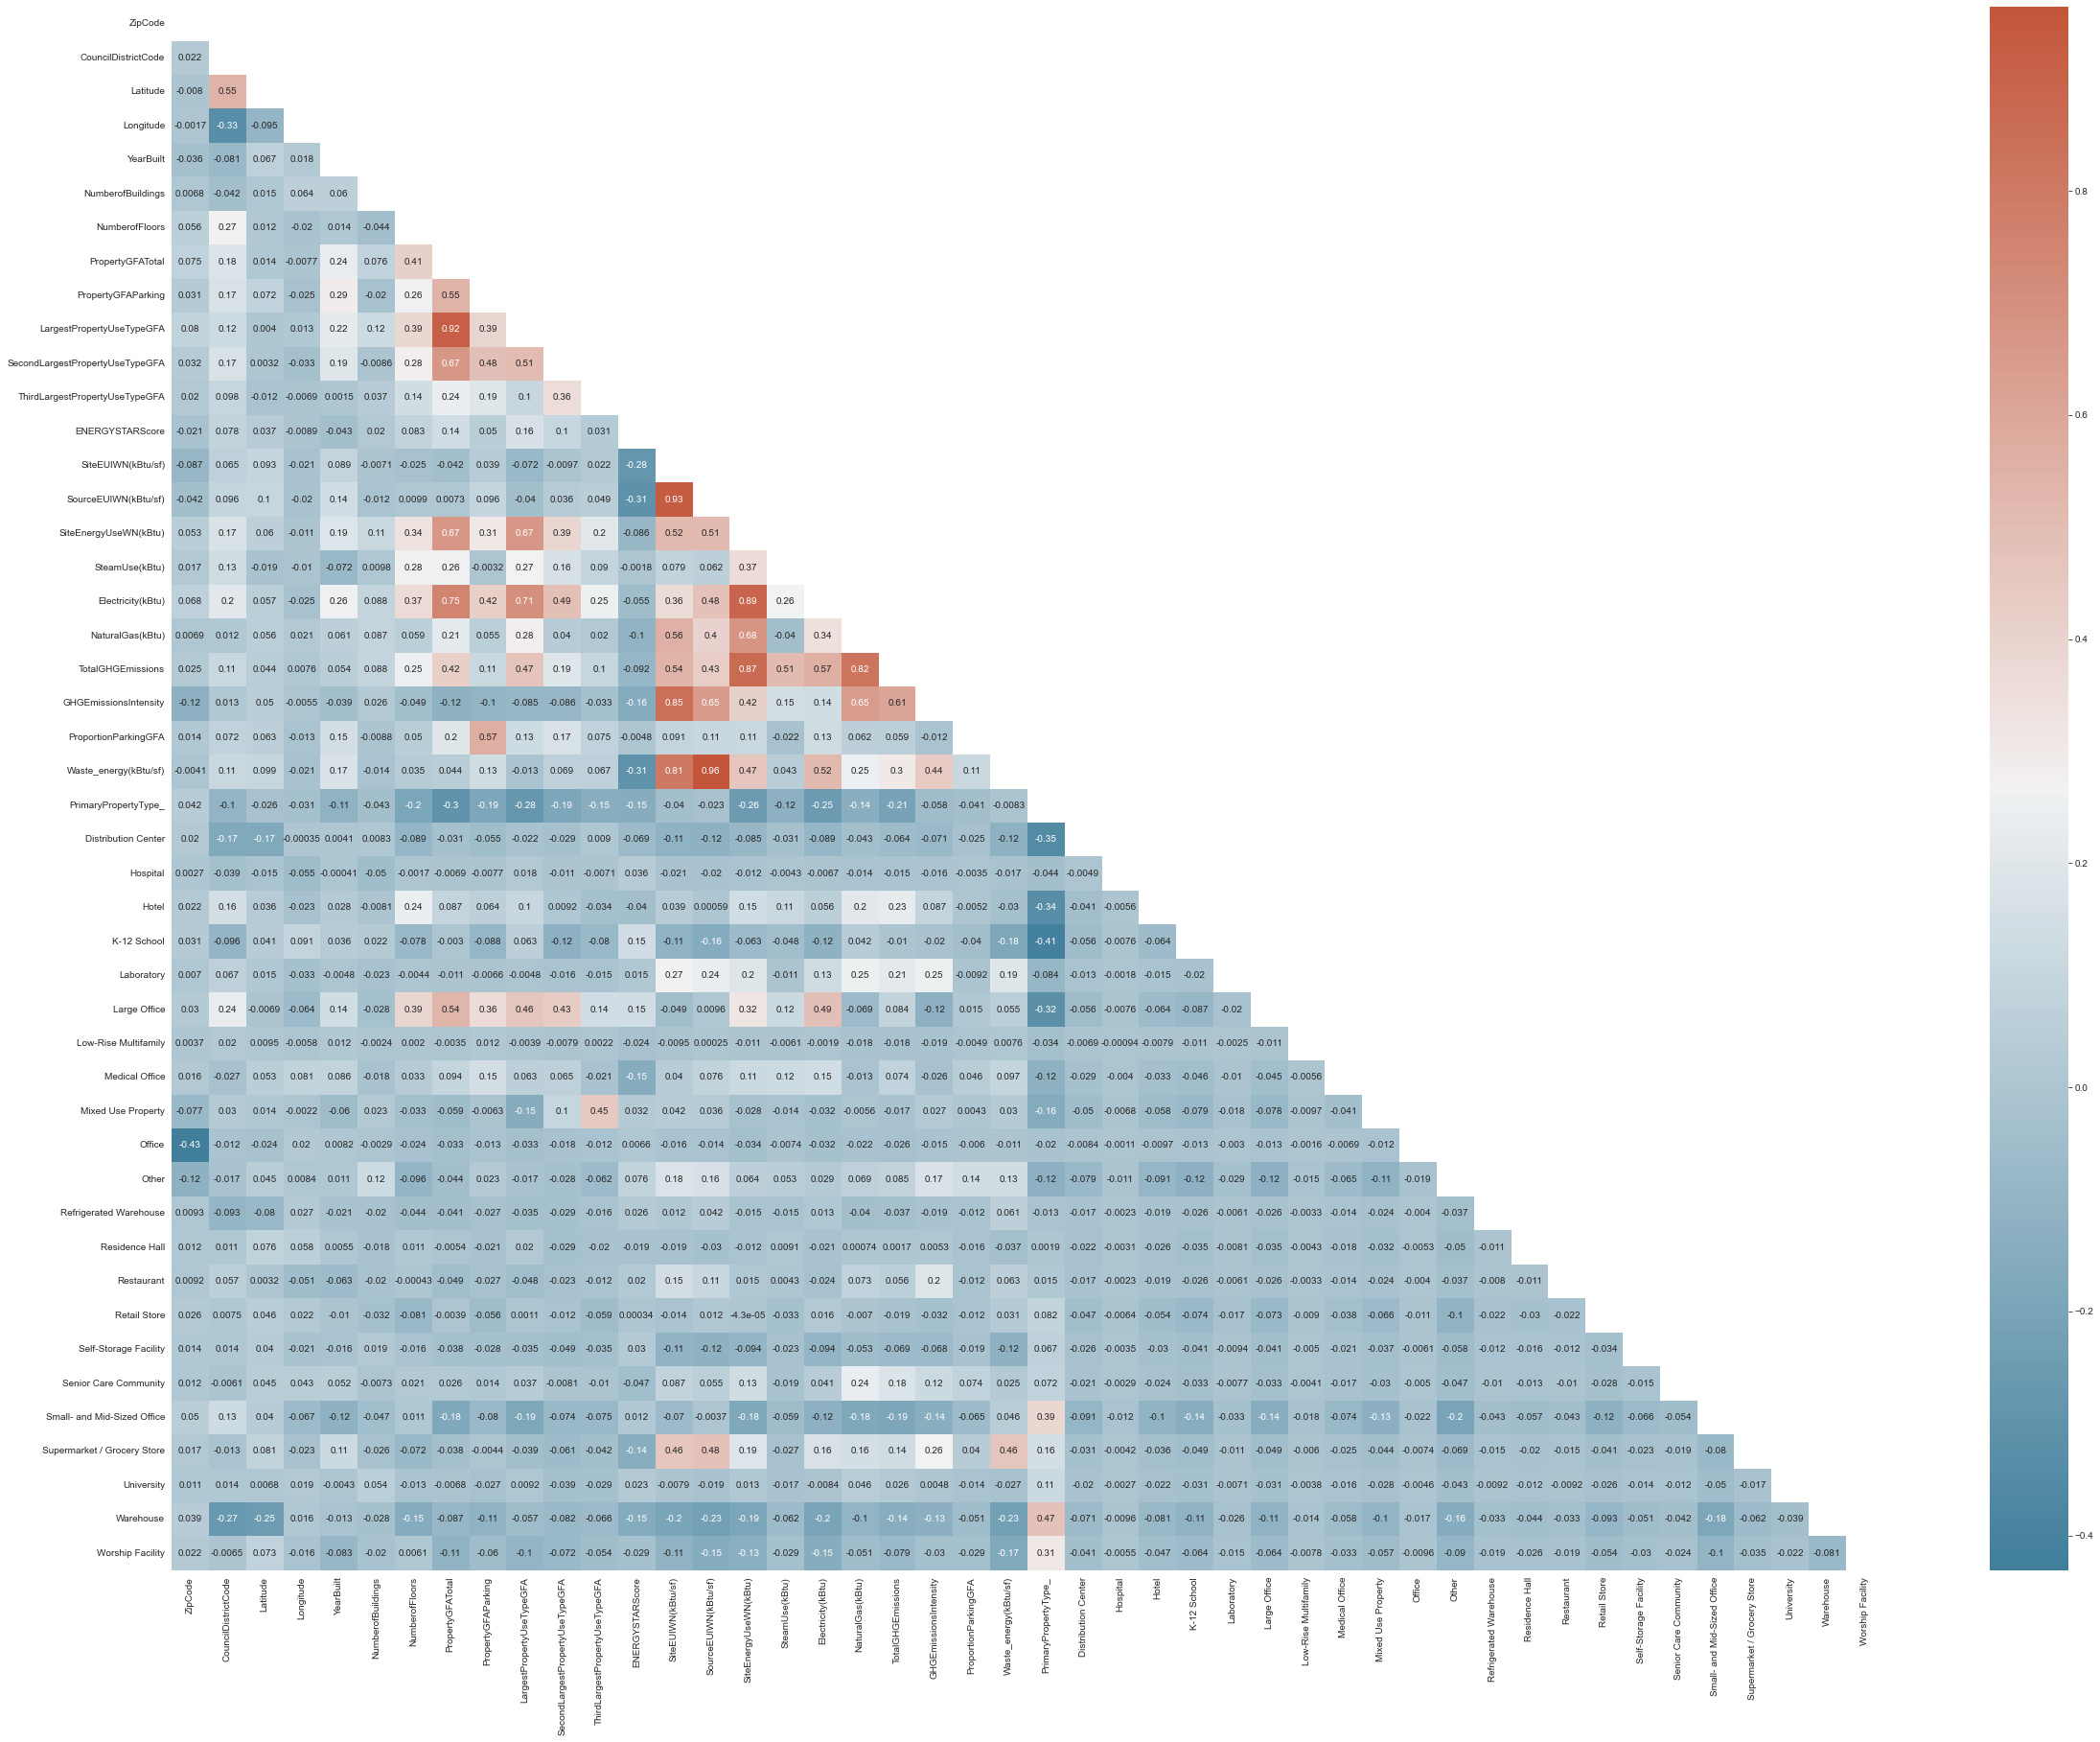

In [6]:
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(40, 30))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [7]:
df_map = df[df['Hospital'] == 1]

In [11]:
fig = px.scatter_mapbox(df,lat=df['Latitude'],lon=df['Longitude'], hover_name=df["Large Office"],color_discrete_sequence=[df['Large Office']], size="GHGEmissionsIntensity",size_max=20, height=600, zoom=10)
# hover_data=['YearBuilt','PropertyGFATotal','GHGEmissionsIntensity']
fig.update_layout(title = 'Seattle map', title_x=0.5)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

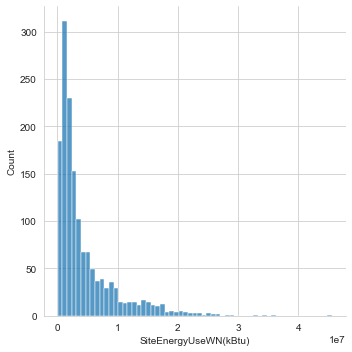

In [12]:
sns.displot(data= df, x=df['SiteEnergyUseWN(kBtu)'])

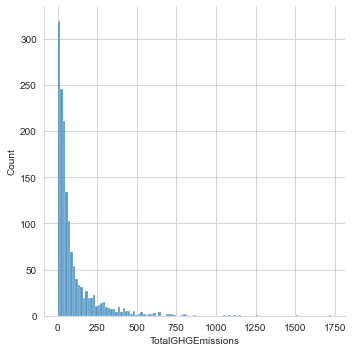

In [13]:
sns.displot(data= df, x=df['TotalGHGEmissions'])

In [ ]:
# transformation log(1 + x)